In [1]:
from keras.datasets import mnist
from keras import layers, models
from tensorflow.keras.utils import to_categorical # one code encoding para las variables de destino
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# cargar set de datos
(train_data,train_labels),(test_data,test_labels) = mnist.load_data() # cargar data desde keras

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
# con esto podemos ver una tupla con (cantidad de datos, dimension en x, dimension en y)
train_data.shape

(60000, 28, 28)

5

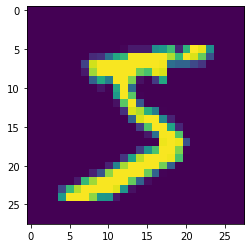

In [35]:
n=0
# imshow permite imprimir imagenes que esten en forma de matriz numerica los colores esta def [0,255]
plt.imshow(train_data[n])

# el labels contendra los labels que corresponden a cada numero
train_labels[n]

In [18]:
# instanciar el modelo
model = models.Sequential()

# definir la red con la cantidad de neuronas de la capa, tipo de funcion de activacion y la dimension del input
model.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
# layer de salida con n neuronas igual a los n resultados posibles
model.add(layers.Dense(10,activation='softmax'))

In [39]:
# compilacion del modelo con sus respectivos parametros de optimizacion
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics="accuracy"
)

In [30]:
# para poder ver la arquitectura de la NN se utiliza summary el cual muestra
# el tipo de NN, tipo de layer, la dimension de entrada del layer y la cantidad de parametros que maneja 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
# redimensionar la data de entrenamiento
# para facilitar el uso de la red neuronal
x_train = train_data.reshape((60000,28*28))

# convertimos los enteros en decimales ya que a una NN trabaja mejor con decimales
# al ser imagenes para convertir todos los valores en flotantes se utiliza la siguente estructura
x_train = x_train.astype("float32")/255
# donde 255 es el valor max que puede tener un pixel

x_test = test_data.reshape((10000,28*28))

x_test = x_test.astype("float32")/255


In [32]:
# con to_categorical tenemos un vector booleano con el valor mas probable de salida
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [38]:
print(train_labels[n])
y_train[n]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [40]:
# entrenamiento de la red neuronal
# con esto podemos ver la disminucion de la funcion de perdida y la precision aumenta progresivamente
model.fit(x_train, y_train, epochs=5, batch_size=128) 

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 0.4310 - accuracy: 0.8756
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1138 - accuracy: 0.9672
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9890


In [41]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0648 - accuracy: 0.9795


[0.06476198136806488, 0.9794999957084656]